## Import some libraries 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import os

%matplotlib inline

print(os.listdir())

['EDA-1.ipynb', '.ipynb_checkpoints', 'EDA-2.ipynb']


In [2]:
data_dir = "../../DATA/kaggle/yoochoose/yoochoose-data/"
file_data = os.listdir(data_dir)
print(file_data)

['yoochoose-test.dat', 'yoochoose-clicks.dat', 'my_training_data_raw.zip', 'dataset-README.txt', 'my_buys_data_raw.zip', 'yoochoose-buys.dat']


## Read Data

**Read Data and Give Column's name**

*Read `Buys` data*

The file `yoochoose-buys.dat` comprising the *buy events* of the users over the items.
Each record/line in the file has the following fields: `Session ID`, `Timestamp`, `Item ID`, `Price`, `Quantity`

* `Session ID` - the id of the session. **In one session there are one or many buying events**. Could be represented as an integer number.
* `Timestamp` - the time **when the buy occurred**. Format of `YYYY-MM-DDThh:mm:ss.SSSZ`
* `Item ID` – the unique identifier of **item that has been bought**. Could be represented as an integer number.
* `Price` – the **price of the item**. Could be represented as an integer number.
* `Quantity` – the **quantity in this buying**.  Could be represented as an integer number.

In [5]:
buys_df = pd.read_csv(data_dir + 'yoochoose-buys.dat',names=["Session_ID", "Timestamp", "Item_ID", "Price", "Quantity"])

**Check data**

In [6]:
buys_df.head()

,Session_ID,Timestamp,Item_ID,Price,Quantity
0,420374,2014-04-06T18:44:58.314Z,214537888,12462,1
1,420374,2014-04-06T18:44:58.325Z,214537850,10471,1
2,281626,2014-04-06T09:40:13.032Z,214535653,1883,1
3,420368,2014-04-04T06:13:28.848Z,214530572,6073,1
4,420368,2014-04-04T06:13:28.858Z,214835025,2617,1


**Check data structure**

In [7]:
buys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150753 entries, 0 to 1150752
Data columns (total 5 columns):
Session_ID    1150753 non-null int64
Timestamp     1150753 non-null object
Item_ID       1150753 non-null int64
Price         1150753 non-null int64
Quantity      1150753 non-null int64
dtypes: int64(4), object(1)
memory usage: 43.9+ MB


**check if any missing data**

In [8]:
buys_df.isnull().sum()

Session_ID    0
Timestamp     0
Item_ID       0
Price         0
Quantity      0
dtype: int64

*No Missing data on `Buys`*

**Read Data and Give Column's name**

*Read `Clicks` data*

The file `yoochoose-clicks.dat` comprising the **clicks** of the users over the items.

Each record/line in the file has the following fields/format: `Session ID`, `Timestamp`, `Item ID`, `Category`

* `Session ID` – the id of the session. In *one session there are one or many clicks*. Could be represented as an integer number.
* `Timestamp` – the *time when the click occurred*. Format of `YYYY-MM-DDThh:mm:ss.SSSZ`
* `Item ID` – the *unique identifier of the item* that has been clicked. Could be represented as an integer number.
* `Category` – the context of the click. The value `"S"` indicates *a special offer*, `"0"` indicates  *a missing value*, a number between `1 to 12` indicates *a real category* identifier,

**any other number indicates a brand**. E.g. if an item has been clicked in the context of a promotion or special offer then the value will be `"S"`, *if the context was a brand* i.e `BOSCH`,
 then the value will be an `8-10` digits number. *If the item has been clicked under regular category, i.e. sport, then the value will be a number between 1 to 12.* 

In [11]:
clicks_df = pd.read_csv(data_dir + 'yoochoose-clicks.dat',names=["Session_ID", "Timestamp", "Item_ID", "Category"])

**check the data**

In [12]:
clicks_df.head()

,Session_ID,Timestamp,Item_ID,Category
0,1,2014-04-07T10:51:09.277Z,214536502,0
1,1,2014-04-07T10:54:09.868Z,214536500,0
2,1,2014-04-07T10:54:46.998Z,214536506,0
3,1,2014-04-07T10:57:00.306Z,214577561,0
4,2,2014-04-07T13:56:37.614Z,214662742,0


In [13]:
clicks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33003944 entries, 0 to 33003943
Data columns (total 4 columns):
Session_ID    int64
Timestamp     object
Item_ID       int64
Category      object
dtypes: int64(2), object(2)
memory usage: 1007.2+ MB


In [14]:
clicks_df.isnull().sum()

Session_ID    0
Timestamp     0
Item_ID       0
Category      0
dtype: int64

## EDA & Preprocessing 

### EDA for `clicks`

*Select click's on items with category*

In [15]:
category_analaysis = clicks_df[(clicks_df['Category'].isin(['S','0','1','2','3','4','5','6','7','8','9','10','11','12']))]

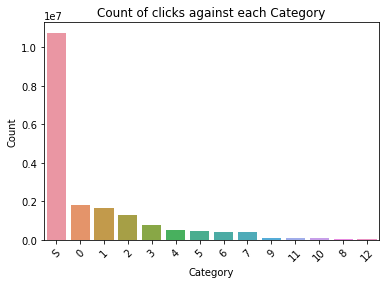

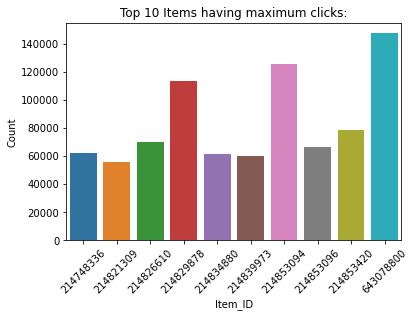

In [16]:
click_category_chart = sns.barplot(x=category_analaysis['Category'].value_counts().index, y=category_analaysis['Category'].value_counts())
click_category_chart.set_xticklabels(click_category_chart.get_xticklabels(),rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of clicks against each Category')
plt.show()

click_item_chart = sns.barplot(x=clicks_df['Item_ID'].value_counts().nlargest(10).index, y=clicks_df['Item_ID'].value_counts().nlargest(10))
click_item_chart.set_xticklabels(click_item_chart.get_xticklabels(),rotation=45)
plt.xlabel('Item_ID')
plt.ylabel('Count')
plt.title('Top 10 Items having maximum clicks:')
plt.show()

### EDA for `Buys`

**Top 10 Items**

Top 10 Items which have been bought the maximum.


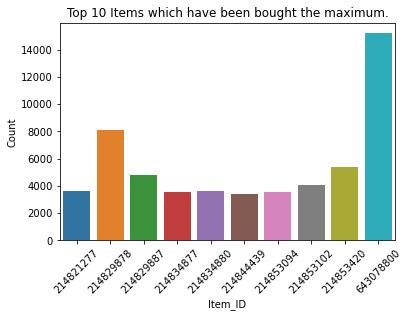

In [17]:
print("Top 10 Items which have been bought the maximum.")

top10_item_buy_chart = sns.barplot(x=buys_df['Item_ID'].value_counts().nlargest(10).index, y=buys_df['Item_ID'].value_counts().nlargest(10))
top10_item_buy_chart.set_xticklabels(top10_item_buy_chart.get_xticklabels(),rotation=45)
plt.xlabel('Item_ID')
plt.ylabel('Count')
plt.title('Top 10 Items which have been bought the maximum.')
plt.show()

**Top 10 items (large Quantity)**

Top 10 items which are purchased in larger quantities.


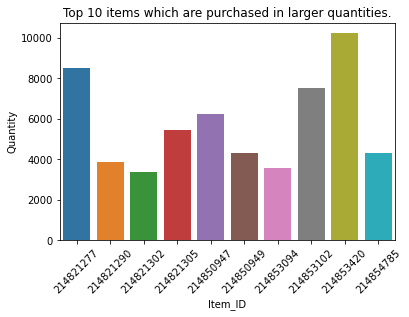

In [18]:
print("Top 10 items which are purchased in larger quantities.")
quantity_analysis = buys_df[['Item_ID','Quantity']].groupby('Item_ID').agg(total_quantity=pd.NamedAgg(column='Quantity',aggfunc=sum))

quant_analysis = quantity_analysis.sort_values('total_quantity',ascending=False).nlargest(10,columns='total_quantity')

top10_item_quantity_chart = sns.barplot(x = quant_analysis.index, y = quant_analysis['total_quantity'] ,data = quant_analysis)
top10_item_quantity_chart.set_xticklabels(top10_item_quantity_chart.get_xticklabels(),rotation=45)
plt.xlabel('Item_ID')
plt.ylabel('Quantity')
plt.title('Top 10 items which are purchased in larger quantities.')
plt.show()

**Top 10 Items (Highest Price)**

Top 10 items Identifying the items having the maximum price.


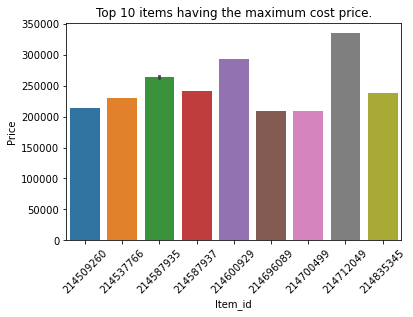

In [19]:
print("Top 10 items Identifying the items having the maximum price.")
buys_plot = buys_df[['Item_ID','Price']].drop_duplicates().sort_values('Price',ascending=False).nlargest(10,columns='Price')

top10_buy_pricy_chart = sns.barplot(x = buys_plot['Item_ID'] , y = buys_plot['Price'] ,data = buys_plot)
top10_buy_pricy_chart.set_xticklabels(top10_buy_pricy_chart.get_xticklabels(),rotation=45)

plt.xlabel('Item_id')
plt.ylabel('Price')
plt.title('Top 10 items having the maximum cost price.')
plt.show()

### Preprocessing & Transformation Data

*Preprocessing for `Buys`*

In [20]:
def transforming_buys(buys):
    print("Transforming the buys...")
    grouped = buys_df.groupby("Session_ID")
    buys_g = pd.DataFrame(index=grouped.groups.keys())        
    buys_g["Number_items_bought"] = grouped.Item_ID.count()
    buys_g["unique_items_bought"] = grouped.Item_ID.unique()
    buys_g["is_buy"] = 1
    buys_g.index.name = "Session_ID"
    print("Transformation of the buys completed...")
    return buys_g

In [21]:
buys_data_df = transforming_buys(buys_df)

Transforming the buys...
Transformation of the buys completed...


In [24]:
buys_data_df.unique_items_bought.iloc[2]

array([214548744, 214838503])

*Preprocessing for `Clicks`*

**Category Mapping**

In [25]:
def convertCategory(x):
        if x == 'S':
            return -1
        elif x in ['1','2','3','4','5','6','7','8','9','10','11','12']:
            return int(x)
        else:
            return 13

In [26]:
clicks_df["Category"] = clicks_df["Category"].apply(convertCategory)

In [27]:
clicks_df["Category"].unique()

array([13, -1,  4,  7,  3,  2,  1,  6,  5, 10,  9, 11, 12,  8])

In [28]:
def transforming_clicks(clicks):

    print("Grouping click data...")
    clicks_new = clicks.groupby('Session_ID')['Timestamp'].agg([min,max])
    clicks_new['max'] = pd.to_datetime(clicks_new['max'])
    clicks_new['min'] = pd.to_datetime(clicks_new['min'])
    
    print("Calculating Dwell Time...")
    clicks_new['Dwell_Time'] = pd.to_datetime(clicks_new['max']) - pd.to_datetime(clicks_new['min']) #cal the dwell time of the session.
    
    clicks_new['Dwell_Time_Seconds'] = clicks_new['Dwell_Time'].astype('timedelta64[s]') #converting dwell time into seconds

    grouped = clicks.groupby('Session_ID')

    print("Calculating the total clicks")
    clicks_new['Total_Clicks'] = grouped.Item_ID.count()

    print("Calculating the day of week")
    clicks_new['Dayofweek'] = clicks_new['min'].dt.dayofweek

    print("Calculating the day of month")
    clicks_new['Dayofmonth'] = clicks_new['min'].dt.day

    print("Calculating hour of click")
    clicks_new['Hourofclick'] = clicks_new['min'].dt.hour

    print("Calculating time of click")
    b = [0,4,8,12,16,20,24]
    l = ['Late Night', 'Early Morning','Morning','Noon','Evening','Night']
    clicks_new['Timeofday'] = pd.cut(clicks_new['Hourofclick'], bins=b, labels=l, include_lowest=True)

    print("Calculating clickrate")
    clicks_new["Click_Rate"] = clicks_new["Total_Clicks"] / clicks_new["Dwell_Time_Seconds"]
    clicks_new.Click_Rate = clicks_new.Click_Rate.replace(np.inf, np.nan)
    clicks_new.Click_Rate = clicks_new.Click_Rate.fillna(0)

    print("**Transformed**")
    return clicks_new

In [29]:
clicks_data_df = transforming_clicks(clicks_df)
#sub_clicks_df = clicks_df[0:100000]

Grouping click data...
Calculating Dwell Time...
Calculating the total clicks
Calculating the day of week
Calculating the day of month
Calculating hour of click
Calculating time of click
Calculating clickrate
**Transformed**


In [30]:
clicks_data_df.head()

,min,max,Dwell_Time,Dwell_Time_Seconds,Total_Clicks,Dayofweek,Dayofmonth,Hourofclick,Timeofday,Click_Rate
Session_ID,,,,,,,,,,
1,2014-04-07 10:51:09.277000+00:00,2014-04-07 10:57:00.306000+00:00,00:05:51.029000,351.0,4,0,7,10,Morning,0.011396
2,2014-04-07 13:56:37.614000+00:00,2014-04-07 14:02:36.889000+00:00,00:05:59.275000,359.0,6,0,7,13,Noon,0.016713
3,2014-04-02 13:17:46.940000+00:00,2014-04-02 13:30:12.318000+00:00,00:12:25.378000,745.0,3,2,2,13,Noon,0.004027
4,2014-04-07 12:09:10.948000+00:00,2014-04-07 12:26:25.416000+00:00,00:17:14.468000,1034.0,2,0,7,12,Morning,0.001934
6,2014-04-06 16:58:20.848000+00:00,2014-04-06 17:02:26.976000+00:00,00:04:06.128000,246.0,2,6,6,16,Noon,0.008130


**Transform `Clicks` 2**

In [31]:
def transforming_clicks2(clicks):
    grouped = clicks.groupby('Session_ID').agg({'Item_ID':['first','last','nunique'],'Category':['nunique']})        
    return grouped

In [32]:
clicks_data_df2 = transforming_clicks2(clicks_df)

In [33]:
clicks_data_df2.head()

Item_ID                    Category
                first       last nunique  nunique
Session_ID                                       
1           214536502  214577561       4        1
2           214662742  214551617       5        1
3           214716935  214832672       3        1
4           214836765  214706482       2        1
6           214701242  214826623       2        1

In [34]:
colnames=['First_Clicked_Item','Last_Clicked_Item','Total_Unique_Items','Total_Unique_Categories']
clicks_data_df2.columns = colnames

In [35]:
clicks_data_df2.head()

,First_Clicked_Item,Last_Clicked_Item,Total_Unique_Items,Total_Unique_Categories
Session_ID,,,,
1,214536502,214577561,4,1
2,214662742,214551617,5,1
3,214716935,214832672,3,1
4,214836765,214706482,2,1
6,214701242,214826623,2,1


**Transform `Clicks` 3**

In [36]:
def transforming_clicks3(clicks):   
    keys, values = clicks.sort_values('Session_ID').values.T
    
    ukeys, index = np.unique(keys, True)
    arrays = np.split(values, index[1:])
    df2 = pd.DataFrame({'a':ukeys, 'b':(a for a in arrays)})
    return df2

In [37]:
clicks_data_df3 = transforming_clicks3(clicks_df[['Session_ID','Item_ID']])

In [38]:
clicks_data_df3.head()

,a,b
0,1,"[214536502, 214536500, 214536506, 214577561]"
1,2,"[214662742, 214662742, 214825110, 214757390, 2..."
2,3,"[214832672, 214716935, 214774687]"
3,4,"[214836765, 214706482]"
4,6,"[214701242, 214826623]"


In [39]:
colnames=['Session_ID','Visited_Items']
clicks_data_df3.columns = colnames
clicks_data_df3 = clicks_data_df3.set_index('Session_ID')

In [40]:
clicks_data_df3.head()

,Visited_Items
Session_ID,
1,"[214536502, 214536500, 214536506, 214577561]"
2,"[214662742, 214662742, 214825110, 214757390, 2..."
3,"[214832672, 214716935, 214774687]"
4,"[214836765, 214706482]"
6,"[214701242, 214826623]"


**Transform `Clicks` 3 for Category**

In [41]:
#['Session_ID','Category']
clicks_data_df3_cat = transforming_clicks3(clicks_df[['Session_ID','Category']])

In [42]:
def calc_special_offer(x):
        if -1 in x:
            return 1
        else:
            return 0

In [43]:
colnames=['Session_ID','Visited_Categories']
clicks_data_df3_cat.columns = colnames
clicks_data_df3_cat = clicks_data_df3_cat.set_index('Session_ID')
clicks_data_df3_cat['Number_Clicked_Visited_Categories'] = clicks_data_df3_cat['Visited_Categories'].apply(lambda x : len(x))
clicks_data_df3_cat['Special_Offer_Click']=clicks_data_df3_cat['Visited_Categories'].apply(calc_special_offer)

### Combined `Clicks` Data

In [44]:
clicks_tranformed = pd.concat([clicks_data_df,clicks_data_df2,clicks_data_df3,clicks_data_df3_cat], axis=1)

In [45]:
clicks_tranformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9249729 entries, 1 to 11562161
Data columns (total 18 columns):
min                                  datetime64[ns, UTC]
max                                  datetime64[ns, UTC]
Dwell_Time                           timedelta64[ns]
Dwell_Time_Seconds                   float64
Total_Clicks                         int64
Dayofweek                            int64
Dayofmonth                           int64
Hourofclick                          int64
Timeofday                            category
Click_Rate                           float64
First_Clicked_Item                   int64
Last_Clicked_Item                    int64
Total_Unique_Items                   int64
Total_Unique_Categories              int64
Visited_Items                        object
Visited_Categories                   object
Number_Clicked_Visited_Categories    int64
Special_Offer_Click                  int64
dtypes: category(1), datetime64[ns, UTC](2), float64(2), int64(10

## Combined `Clicks` and `Buys`

In [46]:
buys_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509696 entries, 11 to 11562121
Data columns (total 3 columns):
Number_items_bought    509696 non-null int64
unique_items_bought    509696 non-null object
is_buy                 509696 non-null int64
dtypes: int64(2), object(1)
memory usage: 15.6+ MB


In [47]:
#training_data = pd.merge(clicks_tranformed,buys_data_df['is_buy'],how='left',left_index=True,right_index=True)
#training_data['is_buy'] = training_data['is_buy'].fillna(0)

In [48]:
print("Clicks data: {}".format(clicks_tranformed.shape))
print("Buys data: {}".format(buys_data_df.shape))
#print("Training data: {}".format(training_data.shape))

Clicks data: (9249729, 18)
Buys data: (509696, 3)


## Dump to HDF5

In [59]:
#!pip install pytables
import pickle

In [60]:
#training_data['is_buy'].unique()

#df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]},index=['a', 'b', 'c'])
#df.to_hdf('data.h5', key='df', mode='w')
#clicks_tranformed.to_hdf(data_dir+'clicks_tranformed.h5', key='df', mode='w',format='table')

data = {"clicks":clicks_tranformed,"buys":buys_data_df}
with open(data_dir+"my_eda1.pkl","wb") as file: 
    pickle.dump(data,file)

In [50]:
#training_data.head()

In [173]:
#training_data.to_csv(data_dir + 'my_training_data_raw.zip', index=True,compression="zip")  

In [52]:
#buys_data_df.to_csv(data_dir + 'my_buys_data_raw.zip', index=True,compression="zip")  

In [51]:
#clicks_data.head()